# **Project : Life Expectancy Prediction**

**Shivshankar Ghyar** [202201040031]

**Tejas Gophane**    [202201040063]

**Srushty Dhamange**  [202201070016]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step1: Load the Dataset**

In [2]:
# EDA Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Read Data into a Dataframe
df = pd.read_csv('/content/drive/MyDrive/College/TY_BTech/AIML/PROJECT1_SEM5/FInalProject/life.csv')

In [25]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
# Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [28]:
df.shape

(2938, 21)

In [29]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### **Step2: Handle Missing Values**

In [46]:
# Check missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [47]:
# Handle missing values
# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [48]:
# Impute categorical columns (if any) with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [49]:
# Verify missing values are handled
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [50]:
df['Life expectancy '].value_counts()

,count
Life expectancy,
73.0,45
75.0,33
78.0,31
73.6,28
73.9,25
...,...
43.1,1
49.5,1
49.0,1


### **Step3: Data Analysis**

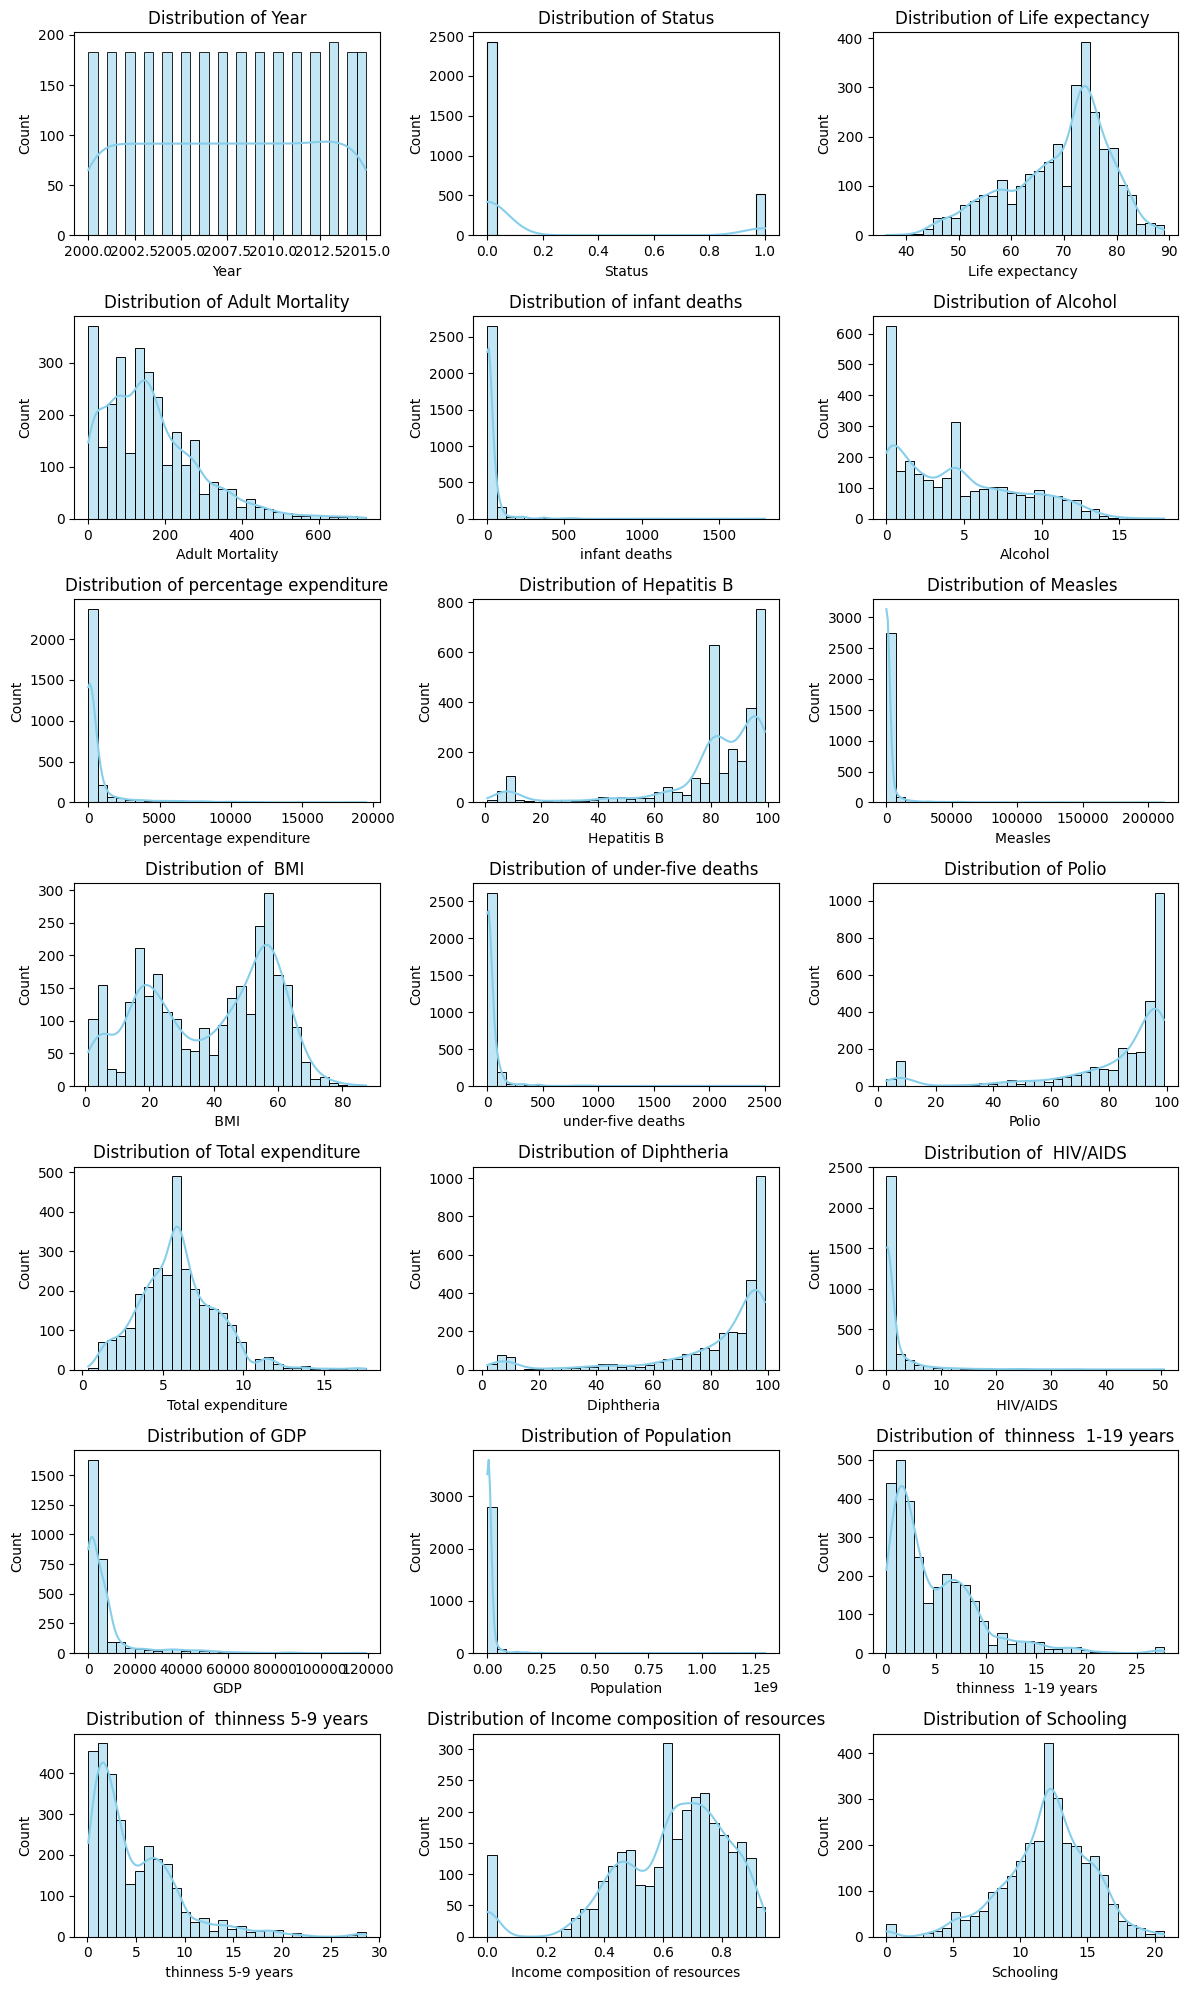

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows, ensuring at least 3 columns (+2 to ensure enough rows)

plt.figure(figsize=(12, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust the grid size
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

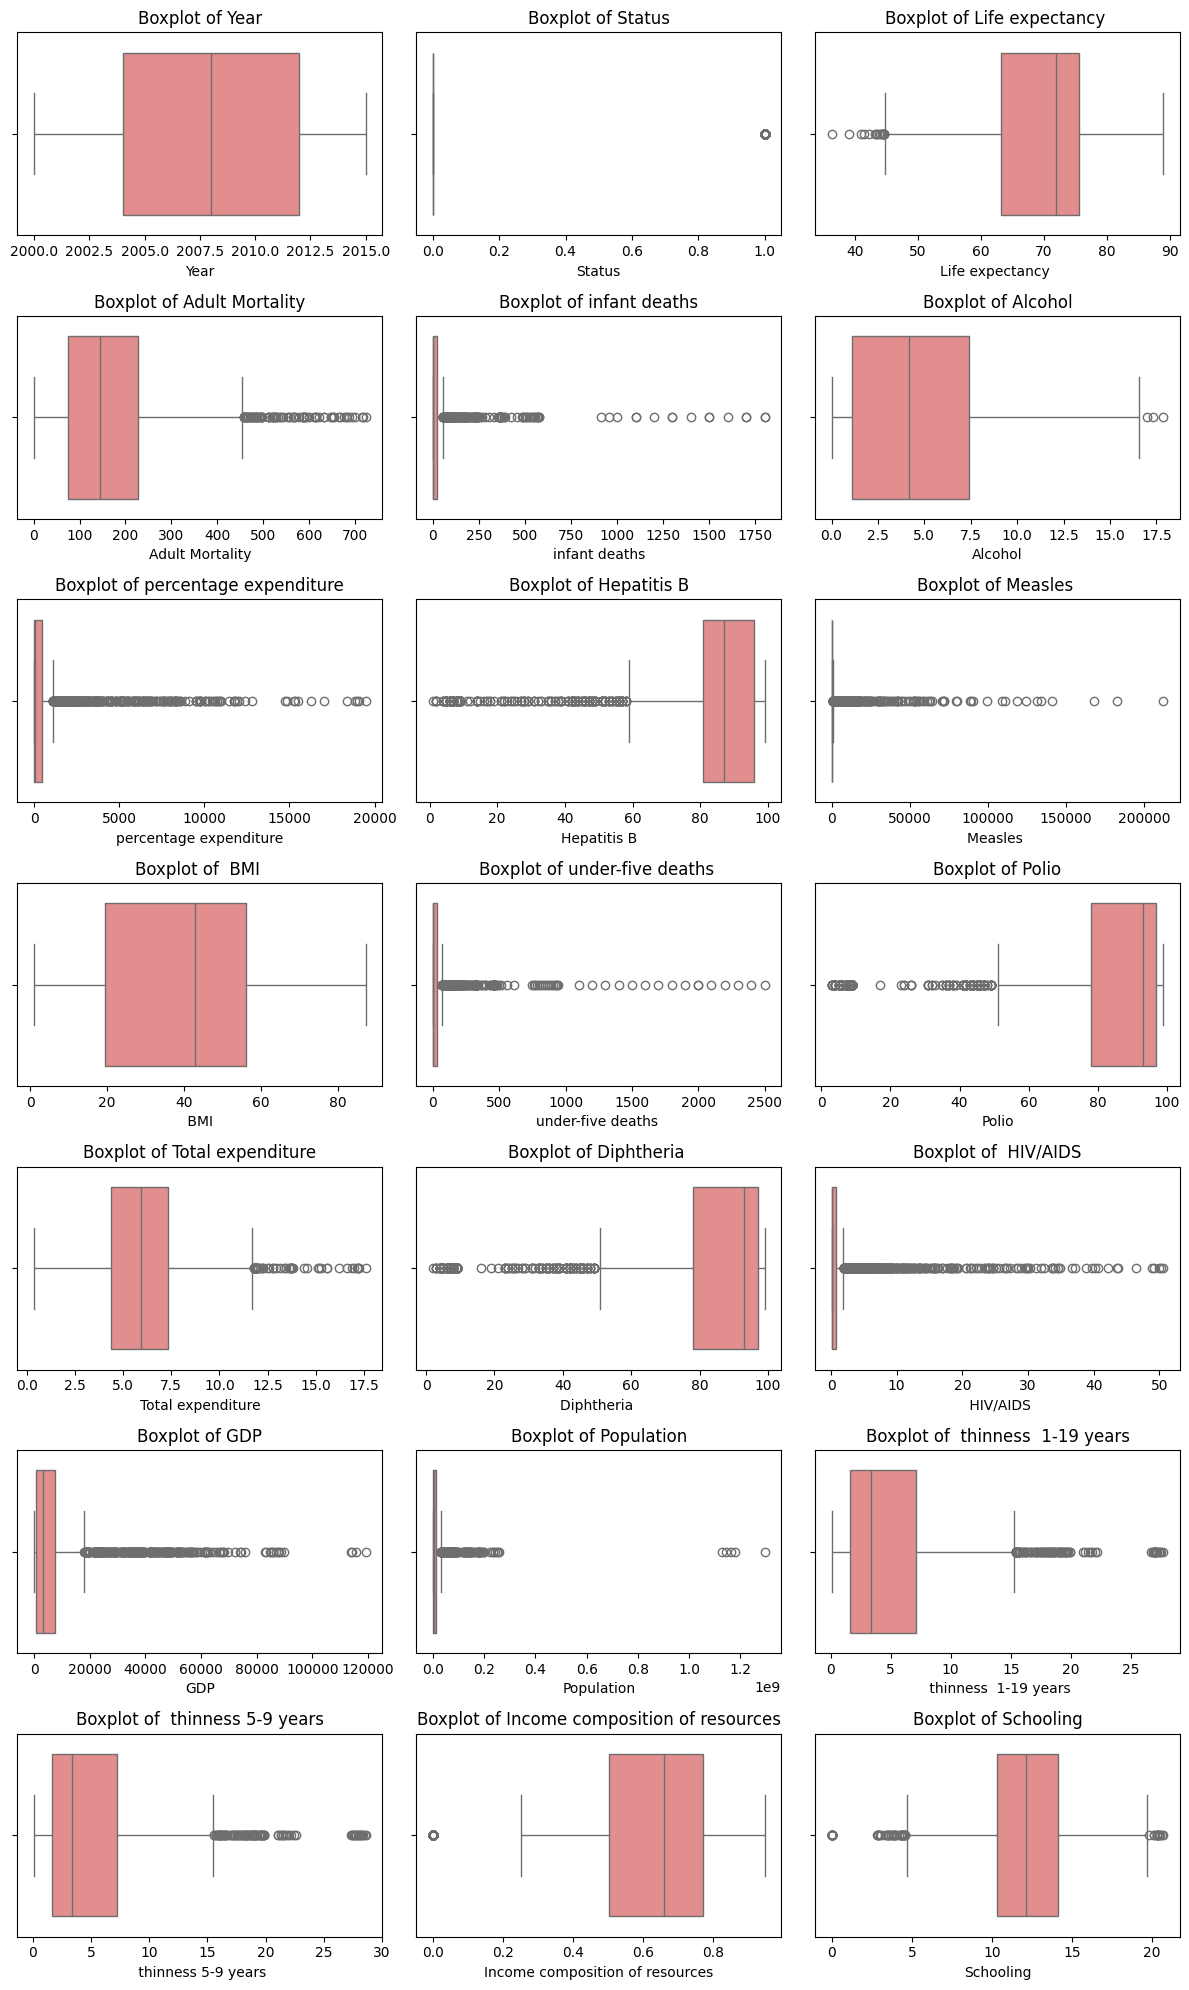

In [41]:
# Boxplot for each numerical feature
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows, ensuring at least 3 columns (+2 for extra rows if needed)

plt.figure(figsize=(12, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust the grid size
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

### **Step4: Feature Encoding**

In [51]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

print("\nData After Encoding:\n", df.head())


Data After Encoding:
    Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0  .

In [31]:
df1 = df

In [32]:
# Replace T,F with 1,0
df1.replace({
    'Developed':1,
    'Developing':0
},inplace=True)

<ipython-input-32-081ad27807d4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({


In [33]:
x_ex = np.array(['Developing','Developed','Developing','Developed'])

for i in x_ex:
    if i == 'Developed':
        print(1)
    else:
        print(0)

0
1
0
1


In [14]:
# Let us check our correlation
df1.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
# create dummy/indicator variables from categorical data in the DataFrame df1
pd.get_dummies(df1)


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [23]:
# Handle missing values
# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
# list of numerical columns with missing values
num_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ',
            'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources',
            'Schooling']

# loop over the numerical columns and fill missing values with random imputation
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median = df[col].median()
        impute_missing_values(df)

In [17]:
print(df.isnull().sum())


Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [18]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### **Step5:Feature Scaling**

In [52]:
# from sklearn.preprocessing import StandardScaler

# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# print("\nData After Scaling:\n", df.head())

### **Step6: Feature Selection**

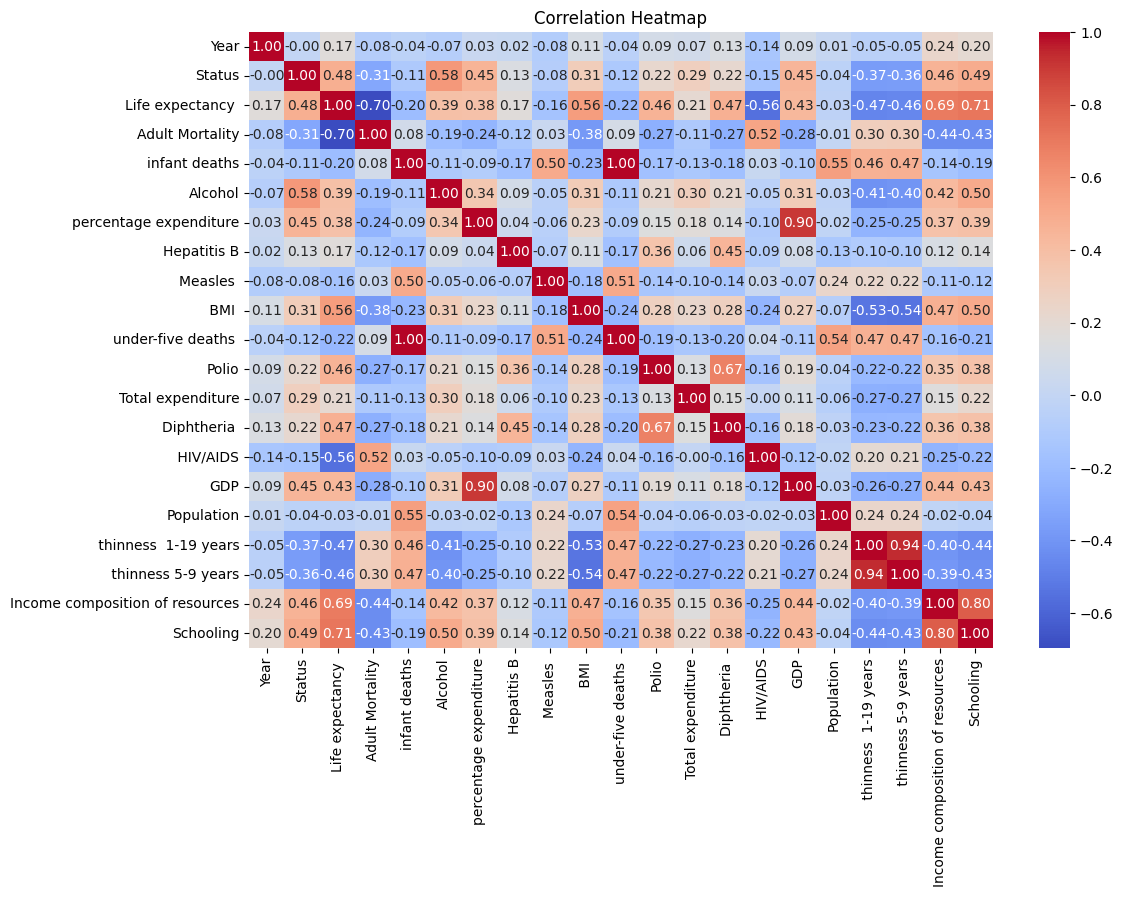

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
correlation_matrix1 = df.corr()

# Plot heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# # Target variable (e.g., 'Life expectancy')
# target = 'Life expectancy '

# # Find correlations with the target variable
# correlations_with_target = correlation_matrix1[target]

# # Set correlation threshold
# threshold = 0.5  # Adjust based on your needs

# # Select features with high correlation
# highly_correlated_features = correlations_with_target[correlations_with_target.abs() > threshold].index.tolist()

# # Ensure target is included in the features
# if target not in highly_correlated_features:
#     highly_correlated_features.append(target)

# # Reduce dataset to selected features
# reduced_df = df[highly_correlated_features]

# # Display selected features
# print(f"Selected features: {highly_correlated_features}")

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
X = df.drop(columns=['Life expectancy '])  # Features
y = df['Life expectancy ']                 # Target

# 2. Select top 5 features based on correlation with the target
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)  # Transform features
selected_features = X.columns[selector.get_support()]  # Get selected feature names

# 3. Update X to include only the selected features
X = X[selected_features]

print("\nTop Selected Features:\n", selected_features)


Top Selected Features:
 Index(['Adult Mortality', ' BMI ', ' HIV/AIDS',
       'Income composition of resources', 'Schooling'],
      dtype='object')


### **Step7: Prepare for Modeling**

In [61]:
#Split the updated dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal Training and Testing Set Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Final Training and Testing Set Shapes:
X_train: (2350, 5)
X_test: (588, 5)
y_train: (2350,)
y_test: (588,)


In [64]:
print("Life Expectancy: ", y)
X

Life Expectancy:  0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,0.1,0.479,10.1
1,271.0,18.6,0.1,0.476,10.0
2,268.0,18.1,0.1,0.470,9.9
3,272.0,17.6,0.1,0.463,9.8
4,275.0,17.2,0.1,0.454,9.5
...,...,...,...,...,...
2933,723.0,27.1,33.6,0.407,9.2
2934,715.0,26.7,36.7,0.418,9.5
2935,73.0,26.3,39.8,0.427,10.0
2936,686.0,25.9,42.1,0.427,9.8


### **Step8: Training Various Regression Models**

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, r2_score


In [67]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

### **Step9: Analysing & Evaluating Models**

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


In [69]:
# Evaluate the regression models
print("Linear Regression:")
evaluate_regression(lin_reg, X_test, y_test)

print("\n\nDecision Tree Regressor:")
evaluate_regression(tree_reg, X_test, y_test)

print("\n\nRandom Forest Regressor:")
evaluate_regression(rf_reg, X_test, y_test)

print("\n\nGradient Boosting Regressor:")
evaluate_regression(gb_reg, X_test, y_test)

Linear Regression:
Mean Squared Error (MSE): 19.65
Root Mean Squared Error (RMSE): 4.43
R-squared (R²): 0.77


Decision Tree Regressor:
Mean Squared Error (MSE): 6.22
Root Mean Squared Error (RMSE): 2.49
R-squared (R²): 0.93


Random Forest Regressor:
Mean Squared Error (MSE): 3.23
Root Mean Squared Error (RMSE): 1.80
R-squared (R²): 0.96


Gradient Boosting Regressor:
Mean Squared Error (MSE): 5.18
Root Mean Squared Error (RMSE): 2.28
R-squared (R²): 0.94


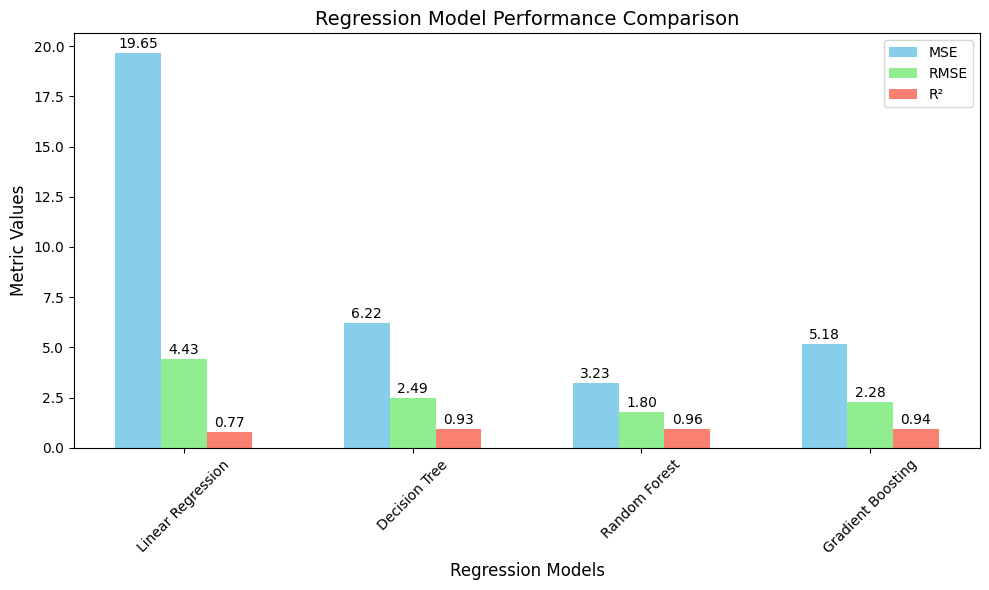

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse = [19.65, 6.22, 3.23, 5.18]
rmse = [4.43, 2.49, 1.80, 2.28]
r2 = [0.77, 0.93, 0.96, 0.94]

# Plotting the metrics
x = np.arange(len(models))  # Position of bars

# Bar width
width = 0.2

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Adding bars for MSE, RMSE, and R²
bar1 = ax.bar(x - width, mse, width, label='MSE', color='skyblue')
bar2 = ax.bar(x, rmse, width, label='RMSE', color='lightgreen')
bar3 = ax.bar(x + width, r2, width, label='R²', color='salmon')

# Adding labels, title, and legend
ax.set_xlabel('Regression Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Regression Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Display the chart
plt.tight_layout()
plt.show()


### **Step10: Training various Classification Models**

In [71]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [75]:
# Define a function to categorize life expectancy
def categorize_life_expectancy(value):
    if 0 <= value <= 55:
        return "Poor"
    elif 56 <= value <= 70:
        return "Moderate"
    elif 71 <= value <= 80:
        return "Satisfactory"
    elif 81 <= value <= 90:
        return "Great"
    else:
        return "Amazing"

In [76]:
# Apply the function to y_train
y_train_categorized = y_train.apply(categorize_life_expectancy)

# Display the categorized labels
print("Categorized Life Expectancy:\n", y_train_categorized.head())

#updatingg y_train
y_train=y_train_categorized



y_test_categorized = y_test.apply(categorize_life_expectancy)
# Display the categorized labels
print("Categorized Life Expectancy:\n", y_test_categorized.head())

#updatingg y_train
y_test=y_test_categorized

Categorized Life Expectancy:
 456     Satisfactory
462     Satisfactory
2172    Satisfactory
2667    Satisfactory
381     Satisfactory
Name: Life expectancy , dtype: object
Categorized Life Expectancy:
 2546    Satisfactory
650     Satisfactory
1740    Satisfactory
177     Satisfactory
1377            Poor
Name: Life expectancy , dtype: object


In [80]:
print("Y_Train: ",y_train.value_counts())
y_train_cnt=y_train.value_counts()
y_test_cnt=y_test.value_counts()
y_test_cnt

Y_Train:  Life expectancy 
Satisfactory    1102
Moderate         766
Poor             255
Great            204
Amazing           23
Name: count, dtype: int64


,count
Life expectancy,
Satisfactory,265
Moderate,205
Poor,60
Great,49
Amazing,9


<ipython-input-81-ecd498a1a12c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_cnt.index, y=y_train_cnt.values, ax=axes[0], palette="Blues_d")
<ipython-input-81-ecd498a1a12c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test_cnt.index, y=y_test_cnt.values, ax=axes[1], palette="Greens_d")


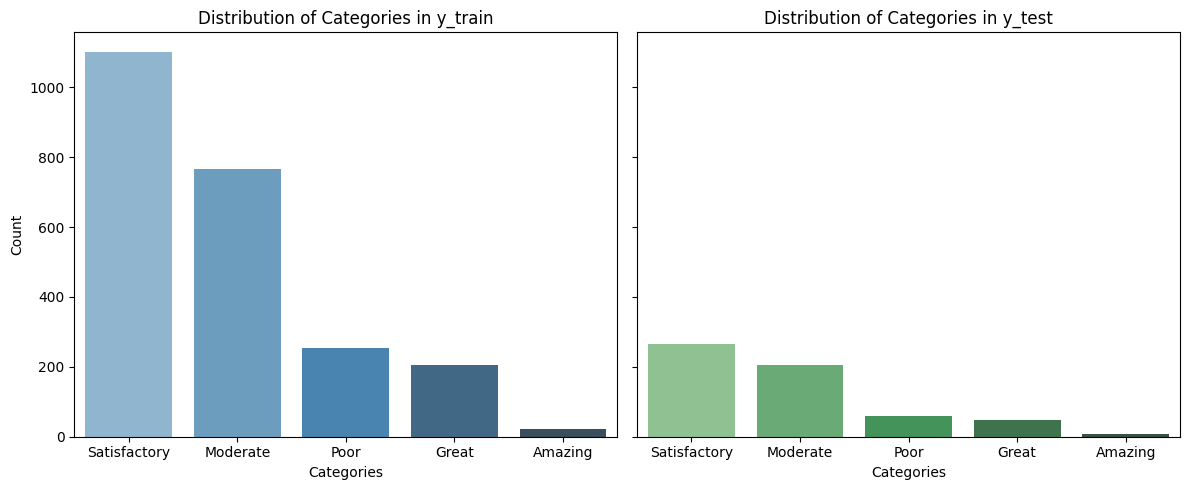

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for y_train and y_test
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for y_train
sns.barplot(x=y_train_cnt.index, y=y_train_cnt.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Distribution of Categories in y_train")
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Count")

# Plot for y_test
sns.barplot(x=y_test_cnt.index, y=y_test_cnt.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Distribution of Categories in y_test")
axes[1].set_xlabel("Categories")

# Adjust layout
plt.tight_layout()
plt.show()


In [82]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)  # Enable probability for ROC-AUC
}


### **Step11: Analysing & Evaluating Models**

In [83]:
results = []

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Save results
    results.append({"Model": name, "Accuracy": accuracy})



--- Training Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

     Amazing       0.00      0.00      0.00         9
       Great       0.45      0.20      0.28        49
    Moderate       0.77      0.74      0.75       205
        Poor       0.79      0.55      0.65        60
Satisfactory       0.73      0.91      0.81       265

    accuracy                           0.74       588
   macro avg       0.55      0.48      0.50       588
weighted avg       0.72      0.74      0.72       588

Confusion Matrix:
[[  0   0   7   2   0]
 [  0  10   0   0  39]
 [  0   0 151   7  47]
 [  0   0  26  33   1]
 [  0  12  13   0 240]]

--- Training Decision Tree ---
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

     Amazing       0.00      0.00      0.00         9
       Great       0.84      0.94      0.88        49
    Moderate       0.88      0.84      0.86       205
        Poor       0.73      0.82      0.77        6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics (update this with actual values from classification_report or evaluation results)
model_names = [result["Model"] for result in results]
accuracies = [result["Accuracy"] for result in results]
precisions = [0.85, 0.80, 0.92, 0.88, 0.87]  # Replace with actual precision values
recalls = [0.84, 0.78, 0.91, 0.86, 0.85]     # Replace with actual recall values
f1_scores = [0.84, 0.79, 0.91, 0.87, 0.86]   # Replace with actual F1-score values

# Combine data for stacked bar plot
metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-Score": f1_scores
}


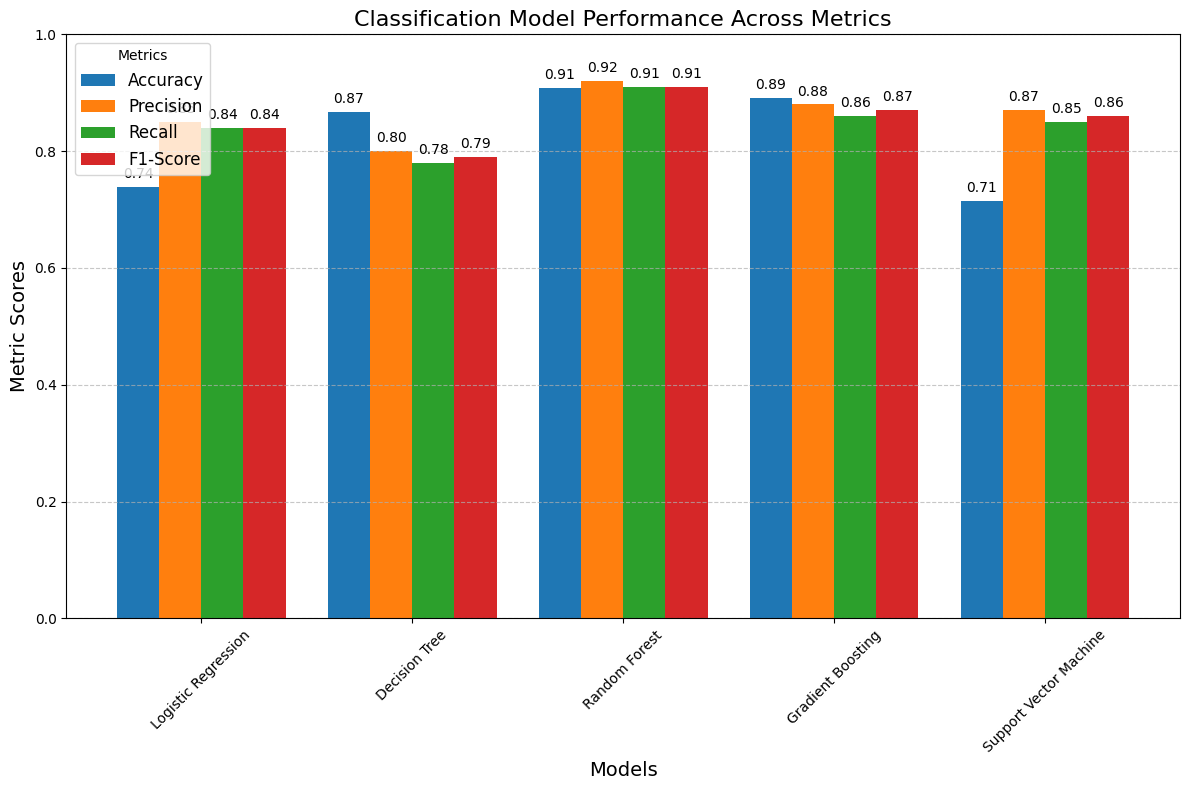

In [87]:

# Plot settings
x = np.arange(len(model_names))  # X-axis positions
width = 0.2  # Bar width

plt.figure(figsize=(12, 8))

# Plot each metric as a separate bar
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.bar(x + i * width, values, width, label=metric_name)

# Add labels, title, and grid
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metric Scores", fontsize=14)
plt.title("Classification Model Performance Across Metrics", fontsize=16)
plt.xticks(x + width * (len(metrics) - 1) / 2, model_names, rotation=45)
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display legend
plt.legend(title="Metrics", fontsize=12)

# Annotate bar values
for i, (metric_name, values) in enumerate(metrics.items()):
    for j, value in enumerate(values):
        plt.text(x[j] + i * width, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Step12: Saving the Best Model for Deployment**

In [89]:
# Predict the target variable for the validation set
y_val_pred = rf_reg.predict(X)

In [91]:
# Evaluate the model performance on the validation set
mse_val = mean_squared_error(y, y_val_pred)
rmse_val = np.sqrt(mse_val)
r_squared_val = rf_reg.score(X, y)

# Print the evaluation metrics on the validation set
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r_squared_val)

Validation Set:
Mean Squared Error: 1.0949023121234052
Root Mean Squared Error: 1.0463757987087647
R-squared: 0.987883484181581


In [92]:
# Predict the target variable for the testing set
y_test_pred = model.predict(X_test)

In [93]:
import pickle

# Assuming you have already trained the model and have the `rfmodel` object available

# Save the model
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [94]:
with open('rfmodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [95]:
import numpy as np

# Create a new input data point with selected features
# Order of features: ['Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']
new_data = np.array([[ 180.0, 25.0, 0.1, 0.7, 12.0]])

# Assume 'loaded_model' is your trained model (already loaded)
# Make a prediction
prediction = loaded_model.predict(new_data)
print(prediction)

['Satisfactory']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
